# Untangling fMRI data to classify Alzheimer's codebook


NOTE: some of the code, especially for formatting, was taken from here https://www.kaggle.com/code/faressayah/practical-guide-to-6-classification-algorithms

In [ ]:
pip install --upgrade ipykernel

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [28]:
data = pd.read_csv('/content/drive/MyDrive/oasis_cross-sectional.csv')
data = pd.DataFrame(data)
#making the gender column into 1s and 0s for ease
data['M/F'] = data['M/F'].replace(['M', 'F'], [1,0])
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,0,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,0,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,1,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,1,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [29]:
data.describe()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,0.385321,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,0.487230,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,0.000000,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,0.000000,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,0.000000,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,1.000000,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,1.000000,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


## Some visualizations

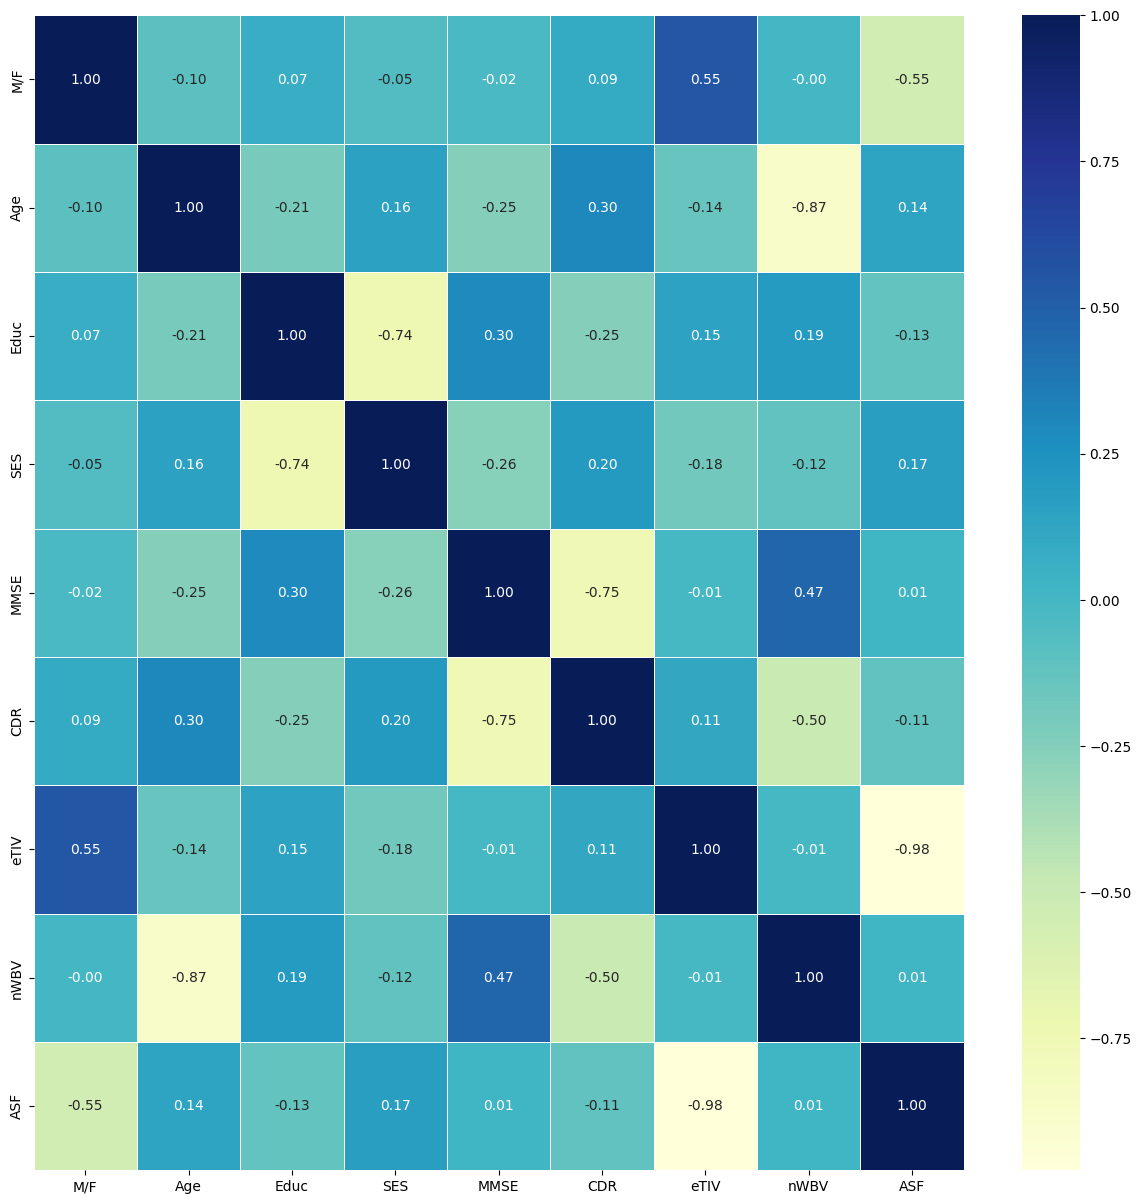

In [34]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()


In [36]:
#removing CDR NAN rows
data['CDR'] = data['CDR'].astype(str)
data = data[data.CDR != 'nan']
data.drop(columns=['ID','Hand','Delay'],inplace=True)
data.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,1,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


In [30]:
data['CDR'].value_counts()

0.0    135
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64

In [23]:
data.describe()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,436.000000,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000
mean,0.385321,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894
std,0.487230,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682
min,0.000000,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000
25%,0.000000,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750
50%,0.000000,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000
75%,1.000000,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250
max,1.000000,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000


Text(0.5, 28.999999999999993, 'Estimated Total Intracranial Volume')

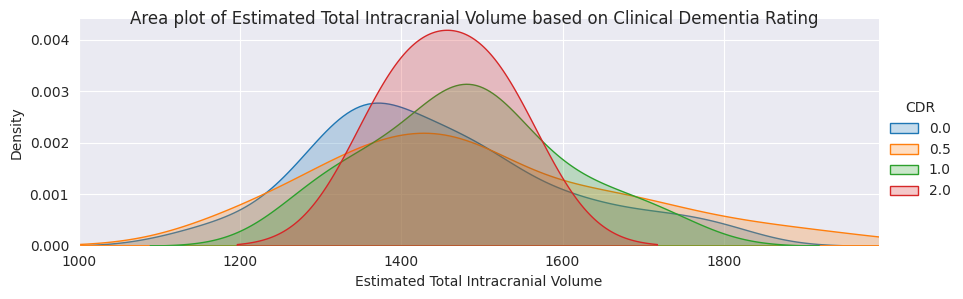

In [ ]:
facet= sns.FacetGrid(data,hue="CDR", aspect=3)
sns.set_style("darkgrid")
facet.map(sns.kdeplot,'eTIV', fill= True)
facet.set(xlim=(1000, data['eTIV'].max()))
facet.fig.suptitle(f'Area plot of Estimated Total Intracranial Volume based on Clinical Dementia Rating')
facet.add_legend()
plt.xlabel("Estimated Total Intracranial Volume")

Text(0.5, 28.999999999999993, 'Normalized Whole Brain Volume')

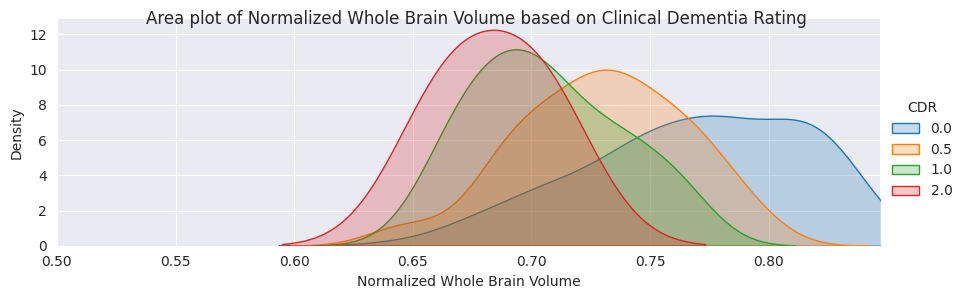

In [ ]:
facet= sns.FacetGrid(data,hue="CDR", aspect=3)
sns.set_style("darkgrid")
facet.map(sns.kdeplot,'nWBV', fill= True)
facet.set(xlim=(0.5, data['nWBV'].max()))
facet.fig.suptitle(f'Area plot of Normalized Whole Brain Volume based on Clinical Dementia Rating')
facet.add_legend()
plt.xlabel("Normalized Whole Brain Volume")

Text(0.5, 28.999999999999993, 'Minimal Mental State Examination')

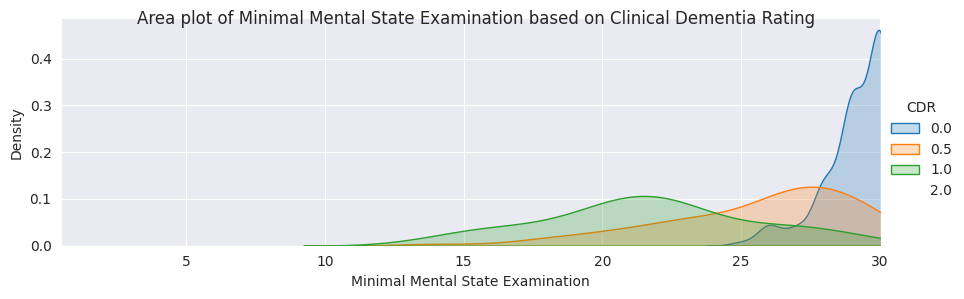

In [38]:
facet= sns.FacetGrid(data,hue="CDR", aspect=3)
facet.map(sns.kdeplot,'MMSE', fill= True)
facet.set(xlim=(0.5, data['MMSE'].max()))
facet.fig.suptitle(f'Area plot of Minimal Mental State Examination based on Clinical Dementia Rating')
facet.add_legend()
plt.xlabel("Minimal Mental State Examination")

Text(0.5, 28.999999999999993, 'Atlas Scaling Factor')

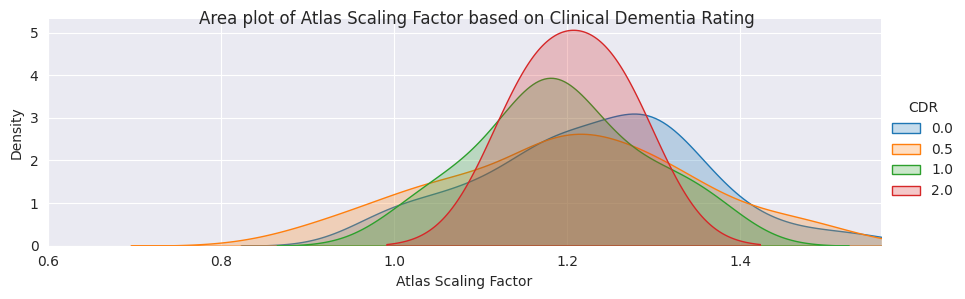

In [ ]:
facet= sns.FacetGrid(data,hue="CDR", aspect=3)
sns.set_style("darkgrid")
facet.map(sns.kdeplot,'ASF', fill= True)
facet.set(xlim=(0.6, data['ASF'].max()))
facet.fig.suptitle(f'Area plot of Atlas Scaling Factor based on Clinical Dementia Rating')
facet.add_legend()
plt.xlabel("Atlas Scaling Factor")

Text(0.5, 28.999999999999993, 'Age')

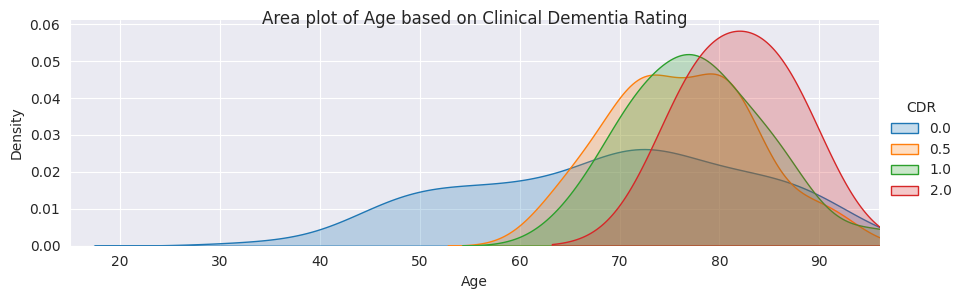

In [ ]:
facet= sns.FacetGrid(data,hue="CDR", aspect=3)
sns.set_style("darkgrid")
facet.map(sns.kdeplot,'Age', fill= True)
facet.set(xlim=(0, data['Age'].max()))
facet.fig.suptitle(f'Area plot of Age based on Clinical Dementia Rating')
facet.add_legend()
plt.xlim(15, 96)
plt.xlabel("Age")

Text(0.5, 28.999999999999993, 'Education on a scale of 1 to 5 categorized by education years')

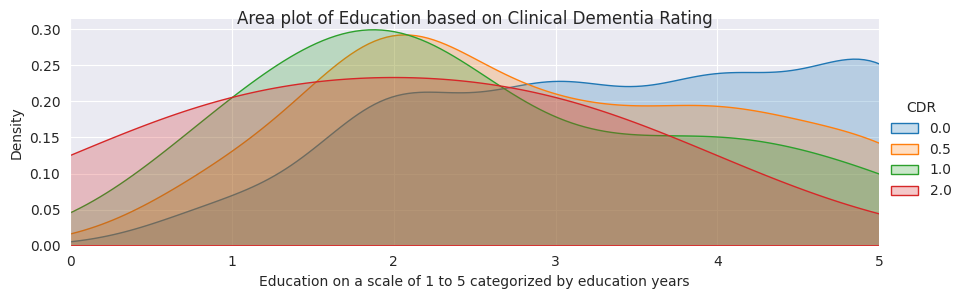

In [ ]:
facet= sns.FacetGrid(data,hue="CDR", aspect=3)
sns.set_style("darkgrid")
facet.map(sns.kdeplot,'Educ', fill= True)
facet.set(xlim=(0, data['Educ'].max()))
facet.fig.suptitle(f'Area plot of Education based on Clinical Dementia Rating')
facet.add_legend()
plt.xlabel("Education on a scale of 1 to 5 categorized by education years")

Text(0.5, 28.999999999999993, 'Socioeconomic status on a scale of 1-5 based on Hollingshead Index of Social Position')

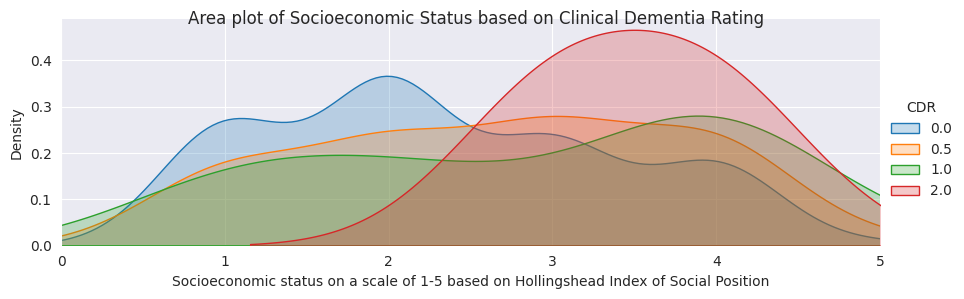

In [ ]:
facet= sns.FacetGrid(data,hue="CDR", aspect=3)
sns.set_style("darkgrid")
facet.map(sns.kdeplot,'SES', fill= True)
facet.set(xlim=(0, data['SES'].max()))
facet.fig.suptitle(f'Area plot of Socioeconomic Status based on Clinical Dementia Rating')
facet.add_legend()
plt.xlabel("Socioeconomic status on a scale of 1-5 based on Hollingshead Index of Social Position")

In [39]:
data.isna().sum()

M/F      0
Age      0
Educ     0
SES     19
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [40]:
#Using the most frequent value to impute the SES missing values
from sklearn.impute  import SimpleImputer
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

imputer.fit(data[['SES']])
data[['SES']] = imputer.fit_transform(data[['SES']])

In [41]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = data.drop(["CDR"],axis=1)
y = data["CDR"].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2,
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Function for printing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Training Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Testing Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
#Logistic regression - choosing parameters to support multinomial analysis
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)
#saving the scores to compare them later
#specifically, using weighted averages to best estimate the metrics
lr_predictions1 = lr_model.predict(X_train_scaled)
lr_accuracy1 = accuracy_score(y_train, lr_predictions1)
lr_precision1 = precision_score(y_train, lr_predictions1, average = 'weighted')
lr_recall1 = recall_score(y_train, lr_predictions1, average = 'weighted')
lr_f1score1 = f1_score(y_train, lr_predictions1, average = 'weighted')
lr_predictions2 = lr_model.predict(X_test_scaled)
lr_accuracy2 = accuracy_score(y_test, lr_predictions2)
lr_precision2 = precision_score(y_test, lr_predictions2, average = 'weighted')
lr_recall2 = recall_score(y_test, lr_predictions2, average = 'weighted')
lr_f1score2 = f1_score(y_test, lr_predictions2, average = 'weighted')
lr_accuracy2 = accuracy_score(y_test, lr_predictions2)
print_score(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 82.76%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        0.5        1.0  2.0         nan  accuracy  \
precision    0.776860   0.625000   0.545455  0.0    0.956250  0.827586   
recall       0.854545   0.593220   0.285714  0.0    0.974522  0.827586   
f1-score     0.813853   0.608696   0.375000  0.0    0.965300  0.827586   
support    110.000000  59.000000  21.000000  1.0  157.000000  0.827586   

            macro avg  weighted avg  
precision    0.580713      0.815849  
recall       0.541600      0.827586  
f1-score     0.552570      0.818574  
support    348.000000    348.000000  
_______________________________________________
Confusion Matrix: 
 [[ 94   9   0   0   7]
 [ 20  35   4   0   0]
 [  3  12   6   0   0]
 [  0   0   1   0   0]
 [  4   0   0   0 153]]

Testing Result:
Accuracy Score: 78.41%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_scaled, y_train)
rfc_predictions1 = rfc_model.predict(X_train_scaled)
#saving the scores to compare them later
#specifically, using weighted averages to best estimate the metrics
rfc_accuracy1 = accuracy_score(y_train, rfc_predictions1)
rfc_precision1 = precision_score(y_train, rfc_predictions1, average = 'weighted')
rfc_recall1 = recall_score(y_train, rfc_predictions1, average = 'weighted')
rfc_f1score1 = f1_score(y_train, rfc_predictions1, average = 'weighted')
rfc_predictions2 = rfc_model.predict(X_test_scaled)
rfc_accuracy2 = accuracy_score(y_test, rfc_predictions2)
rfc_precision2 = precision_score(y_test, rfc_predictions2, average = 'weighted')
rfc_recall2 = recall_score(y_test, rfc_predictions2, average = 'weighted')
rfc_f1score2 = f1_score(y_test, rfc_predictions2, average = 'weighted')
print_score(rfc_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(rfc_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0   0.5   1.0  2.0    nan  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
support    110.0  59.0  21.0  1.0  157.0       1.0      348.0         348.0
_______________________________________________
Confusion Matrix: 
 [[110   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 157]]

Testing Result:
Accuracy Score: 79.55%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5       1.0  2.0        nan  accuracy  \
precision   0.777778   0.312500  0.500000  0.0   1.000000  0.795455   
recall      0.840000   0.454545  0.142857  0.0   0.977273  0.795455   


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_scaled, y_train)
dtc_predictions1 = dtc_model.predict(X_train_scaled)
#saving the scores to compare them later
#specifically, using weighted averages to best estimate the metrics
dtc_accuracy1 = accuracy_score(y_train, dtc_predictions1)
dtc_precision1 = precision_score(y_train, dtc_predictions1, average = 'weighted')
dtc_recall1 = recall_score(y_train, dtc_predictions1, average = 'weighted')
dtc_f1score1 = f1_score(y_train, dtc_predictions1, average = 'weighted')
dtc_predictions2 = dtc_model.predict(X_test_scaled)
dtc_accuracy2 = accuracy_score(y_test, dtc_predictions2)
dtc_precision2 = precision_score(y_test, dtc_predictions2, average = 'weighted')
dtc_recall2 = recall_score(y_test, dtc_predictions2, average = 'weighted')
dtc_f1score2 = f1_score(y_test, dtc_predictions2, average = 'weighted')
print_score(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 82.76%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        0.5        1.0  2.0         nan  accuracy  \
precision    0.776860   0.625000   0.545455  0.0    0.956250  0.827586   
recall       0.854545   0.593220   0.285714  0.0    0.974522  0.827586   
f1-score     0.813853   0.608696   0.375000  0.0    0.965300  0.827586   
support    110.000000  59.000000  21.000000  1.0  157.000000  0.827586   

            macro avg  weighted avg  
precision    0.580713      0.815849  
recall       0.541600      0.827586  
f1-score     0.552570      0.818574  
support    348.000000    348.000000  
_______________________________________________
Confusion Matrix: 
 [[ 94   9   0   0   7]
 [ 20  35   4   0   0]
 [  3  12   6   0   0]
 [  0   0   1   0   0]
 [  4   0   0   0 153]]

Testing Result:
Accuracy Score: 78.41%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5  

In [ ]:
from sklearn.svm import SVC
#make sure to select OVO to compare all binaries
svc_model = SVC(decision_function_shape = 'ovo')
svc_model.fit(X_train_scaled, y_train)
#saving the scores to compare them later
#specifically, using weighted averages to best estimate the metrics
svc_predictions1 = svc_model.predict(X_train_scaled)
svc_accuracy1 = accuracy_score(y_train, svc_predictions1)
svc_precision1 = precision_score(y_train, svc_predictions1, average = 'weighted')
svc_recall1 = recall_score(y_train, svc_predictions1, average = 'weighted')
svc_f1score1 = f1_score(y_train, svc_predictions1, average = 'weighted')
svc_predictions2 = svc_model.predict(X_test_scaled)
svc_accuracy2 = accuracy_score(y_test, svc_predictions2)
svc_precision2 = precision_score(y_test, svc_predictions2, average = 'weighted')
svc_recall2 = recall_score(y_test, svc_predictions2, average = 'weighted')
svc_f1score2 = f1_score(y_test, svc_predictions2, average = 'weighted')
print_score(svc_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(svc_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 87.07%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        0.5        1.0  2.0         nan  accuracy  \
precision    0.814516   0.711538   0.750000  0.0    0.975000   0.87069   
recall       0.918182   0.627119   0.428571  0.0    0.993631   0.87069   
f1-score     0.863248   0.666667   0.545455  0.0    0.984227   0.87069   
support    110.000000  59.000000  21.000000  1.0  157.000000   0.87069   

            macro avg  weighted avg  
precision    0.650211      0.863226  
recall       0.593500      0.870690  
f1-score     0.611919      0.862841  
support    348.000000    348.000000  
_______________________________________________
Confusion Matrix: 
 [[101   5   0   0   4]
 [ 19  37   3   0   0]
 [  3   9   9   0   0]
 [  0   1   0   0   0]
 [  1   0   0   0 156]]

Testing Result:
Accuracy Score: 78.41%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
#saving the scores to compare them later
#specifically, using weighted averages to best estimate the metrics
knn_predictions1 = knn_model.predict(X_train_scaled)
knn_accuracy1 = accuracy_score(y_train, knn_predictions1)
knn_precision1 = precision_score(y_train, knn_predictions1, average = 'weighted')
knn_recall1 = recall_score(y_train, knn_predictions1, average = 'weighted')
knn_f1score1 = f1_score(y_train, knn_predictions1, average = 'weighted')
knn_predictions2 = knn_model.predict(X_test_scaled)
knn_accuracy2 = accuracy_score(y_test, knn_predictions2)
knn_precision2 = precision_score(y_test, knn_predictions2, average = 'weighted')
knn_recall2 = recall_score(y_test, knn_predictions2, average = 'weighted')
knn_f1score2 = f1_score(y_test, knn_predictions2, average = 'weighted')
print_score(knn_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(knn_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 84.77%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        0.5        1.0  2.0         nan  accuracy  \
precision    0.793388   0.632653   0.687500  0.0    0.969136  0.847701   
recall       0.872727   0.525424   0.523810  0.0    1.000000  0.847701   
f1-score     0.831169   0.574074   0.594595  0.0    0.984326  0.847701   
support    110.000000  59.000000  21.000000  1.0  157.000000  0.847701   

            macro avg  weighted avg  
precision    0.616535      0.836756  
recall       0.584392      0.847701  
f1-score     0.596833      0.840013  
support    348.000000    348.000000  
_______________________________________________
Confusion Matrix: 
 [[ 96   9   0   0   5]
 [ 23  31   5   0   0]
 [  2   8  11   0   0]
 [  0   1   0   0   0]
 [  0   0   0   0 157]]

Testing Result:
Accuracy Score: 73.86%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5  

In [ ]:
from xgboost import XGBClassifier
#installing a label encoder to normalize the y data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, le.fit_transform(y_train))
#saving the scores to compare them later
#specifically, using weighted averages to best estimate the metrics
xgb_predictions1 = xgb_model.predict(X_train_scaled)
xgb_accuracy1 = accuracy_score(le.fit_transform(y_train), xgb_predictions1)
xgb_precision1 = precision_score(le.fit_transform(y_train), xgb_predictions1, average = 'weighted')
xgb_recall1 = recall_score(le.fit_transform(y_train), xgb_predictions1, average = 'weighted')
xgb_f1score1 = f1_score(le.fit_transform(y_train), xgb_predictions1, average = 'weighted')
xgb_predictions2 = xgb_model.predict(X_test_scaled)
xgb_accuracy2 = accuracy_score(le.fit_transform(y_test), xgb_predictions2)
xgb_precision2 = precision_score(le.fit_transform(y_test), xgb_predictions2, average = 'weighted')
xgb_recall2 = recall_score(le.fit_transform(y_test), xgb_predictions2, average = 'weighted')
xgb_f1score2 = f1_score(le.fit_transform(y_test), xgb_predictions2, average = 'weighted')
print_score(xgb_model, X_train_scaled, le.fit_transform(y_train), X_test_scaled, le.fit_transform(y_test), train=True)
print_score(xgb_model, X_train_scaled, le.fit_transform(y_train), X_test_scaled, le.fit_transform(y_test), train=False)

Training Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1     2    3      4  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
support    110.0  59.0  21.0  1.0  157.0       1.0      348.0         348.0
_______________________________________________
Confusion Matrix: 
 [[110   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 157]]

Testing Result:
Accuracy Score: 79.55%
_______________________________________________
CLASSIFICATION REPORT:
              0          1         2    3          4  accuracy  macro avg  \
precision   0.8   0.333333  0.400000  0.0   1.000000  0.795455   0.506667   
recall      0.8   0.454545  0.285714  0.0   0.977273  0.795

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(base_estimator = rfc_model)
ada_model.fit(X_train_scaled, y_train)
#saving the scores to compare them later
#specifically, using weighted averages to best estimate the metrics
ada_predictions1 = ada_model.predict(X_train_scaled)
ada_accuracy1 = accuracy_score(y_train, ada_predictions1)
ada_precision1 = precision_score(y_train, ada_predictions1, average = 'weighted')
ada_recall1 = recall_score(y_train, ada_predictions1, average = 'weighted')
ada_f1score1 = f1_score(y_train, ada_predictions1, average = 'weighted')
ada_predictions2 = ada_model.predict(X_test_scaled)
ada_accuracy2 = accuracy_score(y_test, ada_predictions2)
ada_precision2 = precision_score(y_test, ada_predictions2, average = 'weighted')
ada_recall2 = recall_score(y_test, ada_predictions2, average = 'weighted')
ada_f1score2 = f1_score(y_test, ada_predictions2, average = 'weighted')
print_score(ada_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(ada_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0   0.5   1.0  2.0    nan  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
support    110.0  59.0  21.0  1.0  157.0       1.0      348.0         348.0
_______________________________________________
Confusion Matrix: 
 [[110   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 157]]

Testing Result:
Accuracy Score: 82.95%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5       1.0  2.0   nan  accuracy  macro avg  \
precision   0.814815   0.400000  0.500000  0.0   1.0  0.829545   0.542963   
recall      0.880000   0.545455  0.142857  0.0   1.0  0.829

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
#saving the scores to compare them later
#specifically, using weighted averages to best estimate the metrics
gnb_predictions1 = gnb_model.predict(X_train_scaled)
gnb_accuracy1 = accuracy_score(y_train, gnb_predictions1)
gnb_precision1 = precision_score(y_train, gnb_predictions1, average = 'weighted')
gnb_recall1 = recall_score(y_train, gnb_predictions1, average = 'weighted')
gnb_f1score1 = f1_score(y_train, gnb_predictions1, average = 'weighted')
gnb_predictions2 = gnb_model.predict(X_test_scaled)
gnb_accuracy2 = accuracy_score(y_test, gnb_predictions2)
gnb_precision2 = precision_score(y_test, gnb_predictions2, average = 'weighted')
gnb_recall2 = recall_score(y_test, gnb_predictions2, average = 'weighted')
gnb_f1score2 = f1_score(y_test, gnb_predictions2, average = 'weighted')
print_score(ada_model, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(ada_model, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Training Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0   0.5   1.0  2.0    nan  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0  1.0    1.0       1.0        1.0           1.0
support    110.0  59.0  21.0  1.0  157.0       1.0      348.0         348.0
_______________________________________________
Confusion Matrix: 
 [[110   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 157]]

Testing Result:
Accuracy Score: 82.95%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        0.5       1.0  2.0   nan  accuracy  macro avg  \
precision   0.814815   0.400000  0.500000  0.0   1.0  0.829545   0.542963   
recall      0.880000   0.545455  0.142857  0.0   1.0  0.829

In [ ]:
#Making a table with all the results
results_df = pd.DataFrame(data=[["Logistic Regression", lr_accuracy1, lr_precision1, lr_recall1, lr_f1score1, lr_accuracy2, lr_precision2, lr_recall2, lr_f1score2],
                                ["K-Nearest Neighbors", knn_accuracy1, knn_precision1, knn_recall1, knn_f1score1, knn_accuracy2, knn_precision2, knn_recall2, knn_f1score2],
                                ["Support Vector Machine", svc_accuracy1, svc_precision1, svc_recall1, svc_f1score1, svc_accuracy2, svc_precision2, svc_recall2, svc_f1score2],
                                ["Gaussian Naive Bayes", gnb_accuracy1, gnb_precision1, gnb_recall1, gnb_f1score1, gnb_accuracy2, gnb_precision2, gnb_recall2, gnb_f1score2],
                                ["Decision Trees", dtc_accuracy1, dtc_precision1, dtc_recall1, dtc_f1score1, dtc_accuracy2, dtc_precision2, dtc_recall2, dtc_f1score2],
                                ["Random Forest", rfc_accuracy1, rfc_precision1, rfc_recall1, rfc_f1score1, rfc_accuracy2, rfc_precision2, rfc_recall2, rfc_f1score2],
                                ["XGBoost", xgb_accuracy1, xgb_precision1, xgb_recall1, xgb_f1score1, xgb_accuracy2, xgb_precision2, xgb_recall2, xgb_f1score2],
                                ["AdaBoost", ada_accuracy1, ada_precision1, ada_recall1, ada_f1score1, ada_accuracy2, ada_precision2, ada_recall2, ada_f1score2]],
                          columns=['Model', 'Training Accuracy %', 'Training Precision %', 'Training Recall %', 'Training F1-Score %', 'Testing Accuracy %', 'Testing Precision %', 'Testing Recall %', 'Testing F1-Score %'])
results_df

,Model,Training Accuracy %,Training Precision %,Training Recall %,Training F1-Score %,Testing Accuracy %,Testing Precision %,Testing Recall %,Testing F1-Score %
0,Logistic Regression,0.827586,0.815849,0.827586,0.818574,0.784091,0.738062,0.784091,0.758056
1,K-Nearest Neighbors,0.847701,0.836756,0.847701,0.840013,0.738636,0.673009,0.738636,0.703607
2,Support Vector Machine,0.870690,0.863226,0.870690,0.862841,0.784091,0.731576,0.784091,0.756189
3,Gaussian Naive Bayes,0.853448,0.855266,0.853448,0.854148,0.818182,0.816106,0.818182,0.807190
4,Decision Trees,1.000000,1.000000,1.000000,1.000000,0.795455,0.789141,0.795455,0.791665
5,Random Forest,1.000000,1.000000,1.000000,1.000000,0.795455,0.799795,0.795455,0.787684
6,XGBoost,1.000000,1.000000,1.000000,1.000000,0.795455,0.800758,0.795455,0.796118
7,AdaBoost,1.000000,1.000000,1.000000,1.000000,0.829545,0.821254,0.829545,0.815754
